In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv('train.csv', index_col=0).sample(frac=1)
y_train = train['correct']
X_train = train.drop(columns=['name', 'firstChar', 'group', 'correct'])

test = pd.read_csv('test.csv', index_col=0).sample(frac=1)
y_test = test['correct']
X_test = test.drop(columns=['name', 'firstChar', 'group', 'correct'])

In [3]:
s_tr = X_train.sum()
s_te = X_test.sum()

In [4]:
print(f'train median {s_tr.median() / X_train.shape[0] * 100} %')
print(f'test median {s_te.median() / X_test.shape[0] * 100} %')

train median 1.0424971210913279 %
test median 0.978129464776349 %


In [5]:
xs = X_train.iloc[:4 * 10 ** 4, :]
ys = y_train.iloc[:4 * 10 ** 4]

In [26]:
clf = LogisticRegression(random_state=0, C=1e-3, solver='saga', max_iter=10 ** 3).fit(xs, ys)

In [27]:
clf.predict_proba(xs)

array([[0.87793132, 0.12206868],
       [0.88182858, 0.11817142],
       [0.87704441, 0.12295559],
       ...,
       [0.87471456, 0.12528544],
       [0.86946117, 0.13053883],
       [0.86030688, 0.13969312]])

/home/kirill/Documents/1.Projects/class-ranking/intellij-class-usages-analysis/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


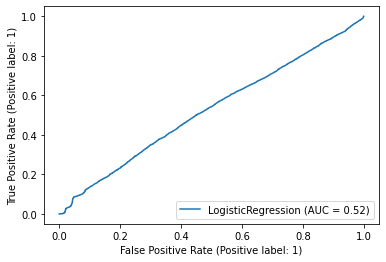

In [28]:
metrics.plot_roc_curve(clf, X_test, y_test)

/home/kirill/Documents/1.Projects/class-ranking/intellij-class-usages-analysis/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


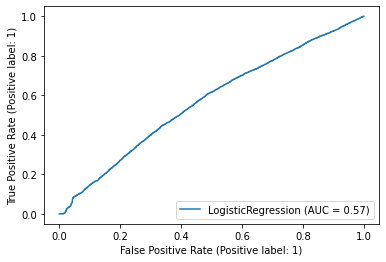

In [29]:
metrics.plot_roc_curve(clf, xs, ys)